In [ ]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('/content/Dataaa.csv')

# Display the number of features
print("Number of features in the dataset:", data.shape[1])
print("Names of the features:", data.columns.tolist())


Number of features in the dataset: 1
Names of the features: ["Type of first element in X_in: <class 'numpy.ndarray'>"]


In [ ]:
# Display the first few lines of the CSV file to understand its content
with open('/content/Dataaa.csv', 'r') as file:
    for _ in range(5):
        print(file.readline())


"Type of first element in X_in: <class 'numpy.ndarray'>"

"Type of first element in X_out: <class 'numpy.ndarray'>"

"First few elements in X_in: [array([[ 0.0000000e+00,  7.4236510e-07,  7.4236510e-07, ...,"

"8.5448107e-07,  8.5448107e-07,  8.5448107e-07],"

"[ 4.1666667e-08, -2.3885614e-03, -2.3796703e-03, ...,"



In [ ]:
import numpy as np
import pandas as pd

# Assuming you have your data loaded into numpy arrays, for example:
# X_in is your input data and X_out is your output data
# Here is a simple example of how to create these arrays (replace this with your actual data loading code)
# X_in = np.random.rand(100, 10)  # Example: 100 samples, 10 features
# X_out = np.random.rand(100, 3)  # Example: 100 samples, 3 output targets

# Convert numpy arrays to pandas DataFrame
X_in_df = pd.DataFrame(X_in)
X_out_df = pd.DataFrame(X_out)

# Concatenate both DataFrames along the columns
data_df = pd.concat([X_in_df, X_out_df], axis=1)

# Save the DataFrame to a CSV file
data_df.to_csv('/content/corrected_data.csv', index=False)


In [ ]:
import numpy as np
import pandas as pd

# Example data (replace with your actual data arrays)
X_in = np.random.rand(100, 10)  # 100 samples, 10 features
X_out = np.random.rand(100, 1)  # 100 samples, 1 target

# Convert to DataFrame
df_in = pd.DataFrame(X_in, columns=[f'feature_{i}' for i in range(X_in.shape[1])])
df_out = pd.DataFrame(X_out, columns=['target'])

# Combine input and output data
full_df = pd.concat([df_in, df_out], axis=1)

# Save to CSV
full_df.to_csv('/content/corrected_data.csv', index=False)


In [ ]:
import pandas as pd

# Load the data from the corrected CSV file
data = pd.read_csv('/content/corrected_data.csv')

# Display the first few rows of the dataset and the shape to verify
print(data.head())
print("Shape of the dataset:", data.shape)
print("Column names:", data.columns.tolist())


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.102974   0.396511   0.411698   0.130324   0.224968   0.201441   
1   0.954740   0.406590   0.231757   0.721605   0.697064   0.631036   
2   0.195421   0.622312   0.718637   0.082305   0.759582   0.836606   
3   0.025230   0.643513   0.196257   0.021668   0.856111   0.761400   
4   0.764795   0.068322   0.686261   0.832339   0.194171   0.964005   

   feature_6  feature_7  feature_8  feature_9    target  
0   0.045020   0.812687   0.146984   0.031833  0.112901  
1   0.429782   0.631824   0.915996   0.937347  0.785631  
2   0.671080   0.566545   0.230185   0.714971  0.714041  
3   0.107318   0.068754   0.897949   0.672117  0.163683  
4   0.633740   0.288913   0.569982   0.873026  0.499354  
Shape of the dataset: (100, 11)
Column names: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'target']


In [ ]:
##Normalizing and Splitting the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting input features and target
X = data.iloc[:, :-1].values  # All columns except the last are features
y = data.iloc[:, -1].values  # Last column is the target

# Normalize the input data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Output the shapes of the datasets to verify everything is as expected
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Train data shape: (70, 10)
Test data shape: (30, 10)


Epoch 1/100
3/3 [==============================] - 2s 160ms/step - loss: 0.4539 - val_loss: 0.3756
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 0.3255 - val_loss: 0.3210
Epoch 3/100
3/3 [==============================] - 0s 26ms/step - loss: 0.2567 - val_loss: 0.3042
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2080 - val_loss: 0.2830
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 0.1769 - val_loss: 0.2534
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.1386 - val_loss: 0.2135
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.1133 - val_loss: 0.1710
Epoch 8/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0876 - val_loss: 0.1322
Epoch 9/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0733 - val_loss: 0.1088
Epoch 10/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0651 - val_loss: 0.1038
Epoch 11/100
3/3 [

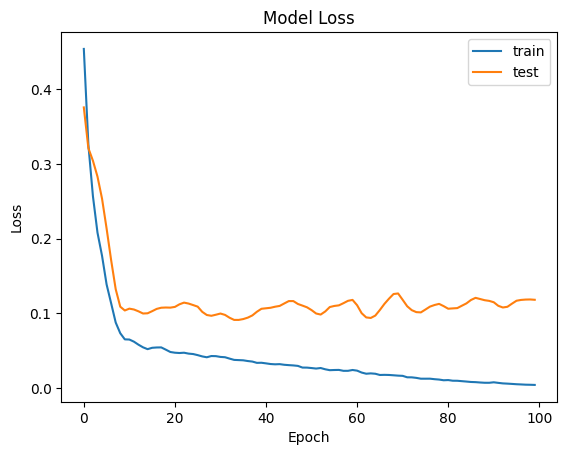

In [ ]:
##Training the RNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Define the RNN model
model = Sequential([
    SimpleRNN(50, input_shape=(X_train.shape[1], 1)),  # 50 RNN units, considering each feature as a time step
    Dense(1)  # Output layer with one neuron for regression output (the target)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape input for RNN which expects (batch_size, timesteps, features)
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=100, validation_data=(X_test_rnn, y_test))

# Optionally, plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
model.save('/content/my_rnn_model.h5')  # Saves the model for later use


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Example threshold value - you need to choose what makes sense for your data
threshold = 0.5

# Convert continuous target data to binary classification
y_train_class = (y_train > threshold).astype(int)

# Proceed with the rest of your RNN setup as before


In [ ]:
##Classifying the presence of damage

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the classification model
classification_model = Sequential([
    SimpleRNN(50, input_shape=(X_train.shape[1], 1)),  # Adjust the input shape and units as necessary
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the classification model
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape data for RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Train the classification model
classification_model.fit(X_train_rnn, y_train_class, epochs=100, validation_split=0.2)

# Save the classification model
classification_model.save('/content/classification_model.h5')


Epoch 1/100
2/2 [==============================] - 2s 324ms/step - loss: 0.7349 - accuracy: 0.5179 - val_loss: 0.7466 - val_accuracy: 0.4286
Epoch 2/100
2/2 [==============================] - 0s 48ms/step - loss: 0.6969 - accuracy: 0.5536 - val_loss: 0.7388 - val_accuracy: 0.4286
Epoch 3/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6645 - accuracy: 0.5893 - val_loss: 0.7393 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 41ms/step - loss: 0.6357 - accuracy: 0.5893 - val_loss: 0.7389 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 58ms/step - loss: 0.6172 - accuracy: 0.6250 - val_loss: 0.7459 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 42ms/step - loss: 0.5948 - accuracy: 0.6429 - val_loss: 0.7489 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 56ms/step - loss: 0.5797 - accuracy: 0.6964 - val_loss: 0.7554 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

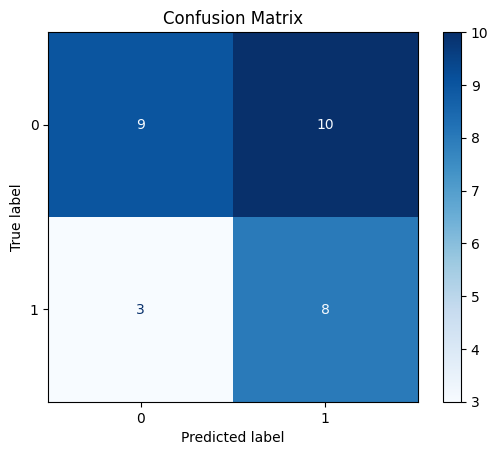

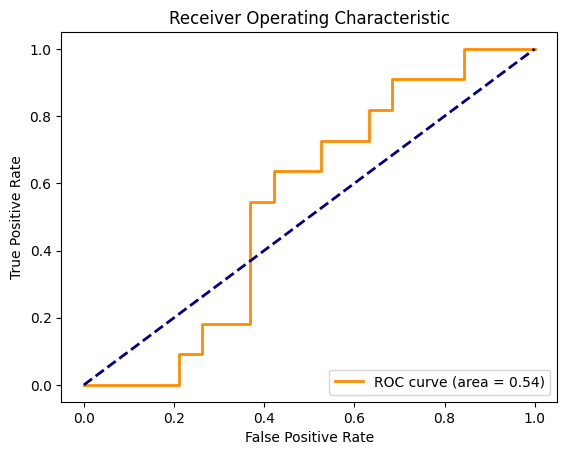

In [ ]:
# Assuming your original test labels are in y_test, and they are not binary (0 or 1) yet
# Apply the same threshold used for the training data
y_test_class = (y_test > threshold).astype(int)

# Now you can compute the confusion matrix and plot it
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# And compute the ROC curve
fpr, tpr, _ = roc_curve(y_test_class, y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_recall_curve

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_class), y=y_train_class)
class_weights_dict = dict(enumerate(class_weights))

# Build an LSTM model
model = Sequential([
    LSTM(100, input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.5),
    LSTM(100),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_rnn, y_train_class, epochs=100, validation_split=0.2, class_weight=class_weights_dict)

# Predict probabilities
y_pred_probs = model.predict(X_test_rnn)

# Find the optimal threshold based on precision-recall tradeoff
precision, recall, thresholds = precision_recall_curve(y_test_class, y_pred_probs)
# Convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# Locate the index of the largest f score
ix = np.argmax(fscore)
optimal_threshold = thresholds[ix]

# Use the optimal threshold to convert probabilities to binary predictions
y_pred_class = (y_pred_probs > optimal_threshold).astype(int)

# Recompute the confusion matrix and ROC curve using the new threshold


Epoch 1/100
2/2 [==============================] - 11s 1s/step - loss: 0.6965 - accuracy: 0.4286 - val_loss: 0.6918 - val_accuracy: 0.6429
Epoch 2/100
2/2 [==============================] - 0s 53ms/step - loss: 0.6937 - accuracy: 0.4107 - val_loss: 0.6973 - val_accuracy: 0.2857
Epoch 3/100
2/2 [==============================] - 0s 54ms/step - loss: 0.6933 - accuracy: 0.5357 - val_loss: 0.7028 - val_accuracy: 0.2143
Epoch 4/100
2/2 [==============================] - 0s 68ms/step - loss: 0.6901 - accuracy: 0.4821 - val_loss: 0.7073 - val_accuracy: 0.2143
Epoch 5/100
2/2 [==============================] - 0s 69ms/step - loss: 0.6953 - accuracy: 0.4643 - val_loss: 0.7099 - val_accuracy: 0.2143
Epoch 6/100
2/2 [==============================] - 0s 54ms/step - loss: 0.6938 - accuracy: 0.4464 - val_loss: 0.7129 - val_accuracy: 0.2143
Epoch 7/100
2/2 [==============================] - 0s 61ms/step - loss: 0.6943 - accuracy: 0.5536 - val_loss: 0.7152 - val_accuracy: 0.2143
Epoch 8/100
2/2 [====

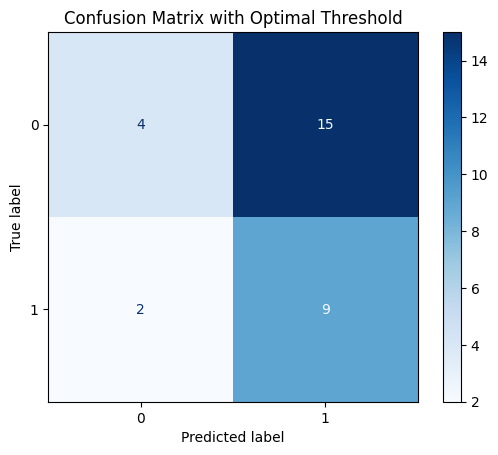

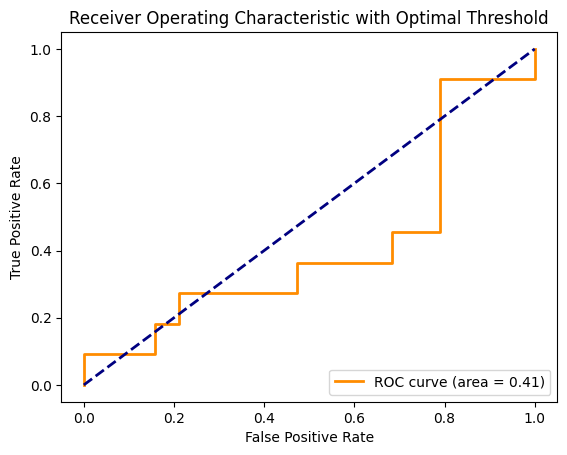

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Use the optimal threshold to convert probabilities to binary predictions
y_pred_class_optimal = (y_pred_probs > optimal_threshold).astype(int)

# Compute the confusion matrix using the optimal threshold
cm_optimal = confusion_matrix(y_test_class, y_pred_class_optimal)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimal)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Optimal Threshold')
plt.show()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_class, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with Optimal Threshold')
plt.legend(loc="lower right")
plt.show()


1/1 [==============================] - 0s 27ms/step


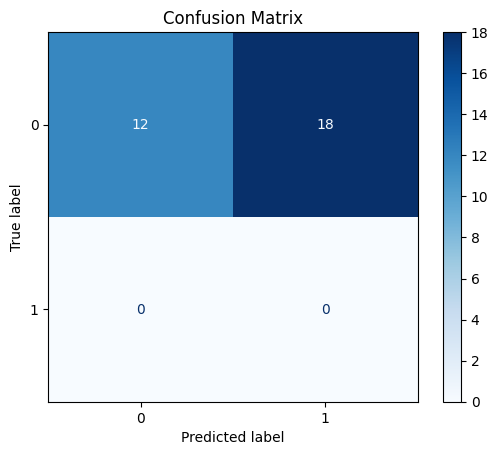

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


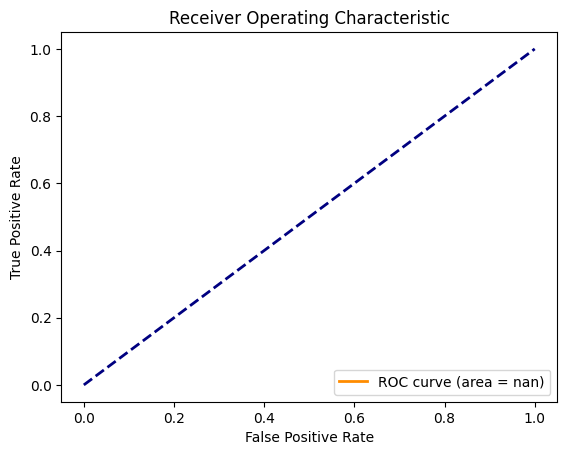

In [ ]:
# Make sure the 'y_test_class' and 'y_train_class' variables are set correctly before this step.
# For the sake of example, let's assume 'y_test' is the variable holding the original test labels.

# Verify and correct labels if necessary
# 'damage' is 1, 'no damage' is 0
y_test_class = np.where(y_test == 'damage', 1, 0)

# Now, use your model to predict probabilities on the test set
# Assuming 'X_test_rnn' is already defined and shaped correctly
y_pred_probs = classification_model.predict(X_test_rnn)

# Choose a decision threshold (if you've found an optimal one, use that, otherwise use 0.5)
threshold = 0.5  # or optimal_threshold if you have one

# Convert predicted probabilities into binary class predictions
y_pred_class = (y_pred_probs > threshold).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_class, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Reshape data from 2D to 3D (samples, timesteps, features)
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))


In [ ]:
# Define the LSTM model for binary classification
lstm_model = Sequential([
    LSTM(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),  # Correct input_shape
    Dense(1, activation='sigmoid')
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history = lstm_model.fit(X_train_rnn, y_train_class, epochs=100, validation_split=0.2)

# ... (Continue with the rest of the code as before)


Epoch 1/100
2/2 [==============================] - 4s 957ms/step - loss: 0.7059 - accuracy: 0.3750 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 79ms/step - loss: 0.7015 - accuracy: 0.3750 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 72ms/step - loss: 0.6978 - accuracy: 0.4286 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 70ms/step - loss: 0.6941 - accuracy: 0.4286 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 76ms/step - loss: 0.6907 - accuracy: 0.4821 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 66ms/step - loss: 0.6874 - accuracy: 0.5179 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 76ms/step - loss: 0.6836 - accuracy: 0.5179 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

Epoch 1/100
2/2 [==============================] - 0s 282ms/step - loss: 0.4169 - accuracy: 0.8393 - val_loss: 0.8048 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 105ms/step - loss: 0.4147 - accuracy: 0.8393 - val_loss: 0.8078 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 90ms/step - loss: 0.4124 - accuracy: 0.8393 - val_loss: 0.8109 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 54ms/step - loss: 0.4102 - accuracy: 0.8393 - val_loss: 0.8140 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 73ms/step - loss: 0.4081 - accuracy: 0.8393 - val_loss: 0.8173 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 70ms/step - loss: 0.4060 - accuracy: 0.8571 - val_loss: 0.8207 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 53ms/step - loss: 0.4037 - accuracy: 0.8571 - val_loss: 0.8236 - val_accuracy: 0.5000
Epoch 8/100
2/2 [=

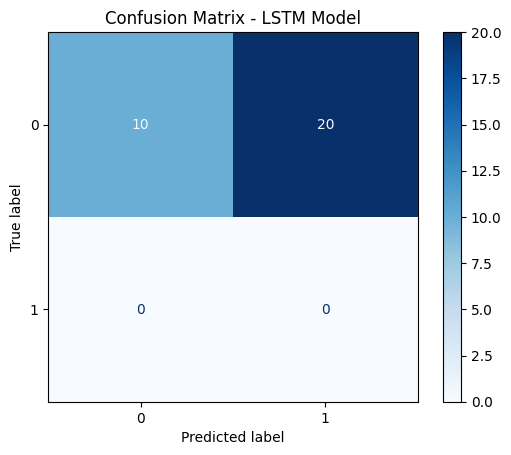

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


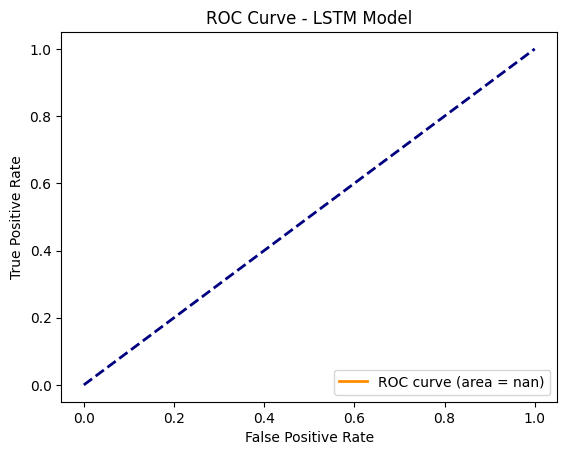

In [ ]:
# Assuming your data is correctly reshaped to 3D for LSTM and 'y_train_class' holds the binary labels

# Continue training the LSTM model
history = lstm_model.fit(
    X_train_rnn,
    y_train_class,
    epochs=100,
    validation_split=0.2
)

# Assuming 'X_test' and 'y_test' are your test data and labels, respectively
# Reshape the test data to match the input shape of the model
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Predict class probabilities on the test set
y_pred_probs = lstm_model.predict(X_test_rnn)

# Choose a decision threshold
threshold = 0.5  # Adjust based on your optimal threshold
y_pred_class = (y_pred_probs > threshold).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - LSTM Model')
plt.show()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_class, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM Model')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Check the range of predicted probabilities
print("Predicted probabilities:", y_pred_probs)

# Check if there are both classes present in the test labels
print("Unique labels in y_test_class:", np.unique(y_test_class))


Predicted probabilities: [[0.7454162 ]
 [0.7437712 ]
 [0.6330803 ]
 [0.89748466]
 [0.20552409]
 [0.9472765 ]
 [0.85178375]
 [0.97781944]
 [0.13122998]
 [0.9917822 ]
 [0.8533768 ]
 [0.06356653]
 [0.43143782]
 [0.50791705]
 [0.17546357]
 [0.01664866]
 [0.96507597]
 [0.90373135]
 [0.52591985]
 [0.22702323]
 [0.81641984]
 [0.67864764]
 [0.661725  ]
 [0.93879306]
 [0.94223934]
 [0.68000364]
 [0.99042076]
 [0.00691278]
 [0.18692319]
 [0.2215116 ]]
Unique labels in y_test_class: [0]


In [ ]:
# Check unique values in the labels array
unique_classes = np.unique(y)
print("Unique classes in y:", unique_classes)


Unique classes in y: [0.01719974 0.02000646 0.0230836  0.03231997 0.04509573 0.04551169
 0.05540832 0.06787676 0.07811607 0.08566781 0.08859851 0.08866176
 0.09501671 0.09979471 0.11560955 0.1299406  0.1375302  0.14640541
 0.14857923 0.16046116 0.18426143 0.18945017 0.19668808 0.20336498
 0.22591194 0.23655779 0.24578735 0.25692265 0.27537928 0.30322744
 0.30386795 0.30888874 0.31492058 0.31576589 0.3461643  0.34623043
 0.34694271 0.36754485 0.37382615 0.3877619  0.3951531  0.41476349
 0.42254058 0.42576649 0.43679891 0.44330438 0.45592128 0.45677628
 0.47927551 0.49703069 0.50310825 0.52038588 0.52749253 0.53250067
 0.53579478 0.55829683 0.56959791 0.57911016 0.5996906  0.60926981
 0.64081111 0.64248888 0.64379359 0.64572414 0.65031069 0.65108996
 0.66769136 0.67666698 0.68239306 0.69572005 0.70408227 0.70574692
 0.71079391 0.71253874 0.75196858 0.75790615 0.7613012  0.76164767
 0.76268006 0.76536053 0.79546299 0.79993517 0.79996053 0.81339981
 0.81410338 0.83534154 0.86636636 0.87044

In [ ]:
# Define a threshold to convert continuous values to binary classification
threshold = 0.5  # This is just an example, adjust this based on your domain knowledge
y_class = (y > threshold).astype(int)

# Now check the distribution of the new binary labels
print("Distribution of binary labels:", np.bincount(y_class))

# Continue with the train-test split with the new binary labels
X_train, X_test, y_train_class, y_test_class = train_test_split(
    X, y_class,
    test_size=0.2,
    stratify=y_class,
    random_state=42
)


Distribution of binary labels: [50 50]


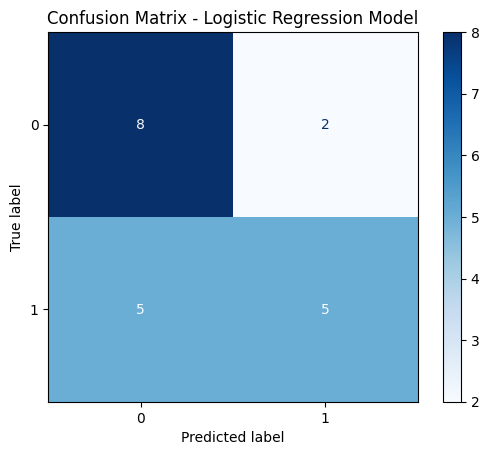

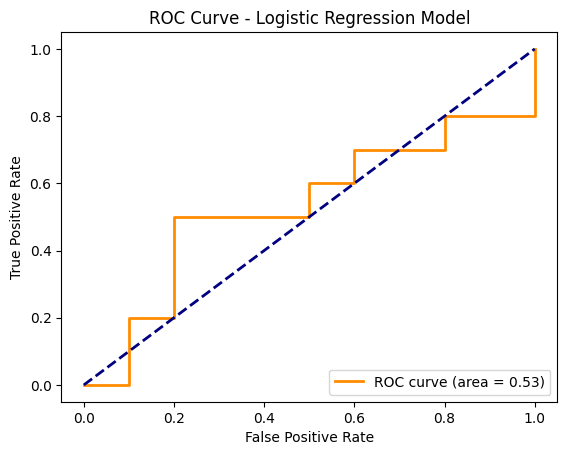

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Perform the stratified train-test split with the new binary labels
X_train, X_test, y_train_class, y_test_class = train_test_split(
    X, y_class,
    test_size=0.2,
    stratify=y_class,
    random_state=42
)

# Train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_class)

# Predict class probabilities on the test set
y_pred_probs_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Predict class labels for the test set based on the default threshold of 0.5
y_pred_class_logistic = logistic_model.predict(X_test)

# Compute the confusion matrix
cm_logistic = confusion_matrix(y_test_class, y_pred_class_logistic)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

# Compute ROC curve and AUC
fpr_logistic, tpr_logistic, _ = roc_curve(y_test_class, y_pred_probs_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()


In [35]:
# Reshape X_test_rnn to match the expected input shape of the model (10 time steps, 1 feature per step)
X_test_rnn_reshaped = X_test_rnn.reshape((X_test_rnn.shape[0], 10, 1))

# Now make predictions with the reshaped data
y_pred_probs_rnn = rnn_model.predict(X_test_rnn_reshaped)

# Continue with the rest of the code for evaluation


1/1 [==============================] - 1s 876ms/step


In [37]:
print("Number of samples in test set:", y_test_class.shape[0])
print("Number of predictions made:", y_pred_probs_rnn.shape[0])


Number of samples in test set: 20
Number of predictions made: 30


In [ ]:
##Using LSTM to better predict

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model for binary classification
lstm_classification_model = Sequential([
    LSTM(2, input_shape=(X_train.shape[1], 1)),  # 50 LSTM units
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the LSTM model
lstm_classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history = lstm_classification_model.fit(
    X_train_rnn, y_train_class,
    epochs=100,
    validation_split=0.2
)

# Save the LSTM classification model
lstm_classification_model.save('/content/lstm_classification_model.h5')


Epoch 1/100
2/2 [==============================] - 4s 813ms/step - loss: 0.6910 - accuracy: 0.5179 - val_loss: 0.6889 - val_accuracy: 0.5714
Epoch 2/100
2/2 [==============================] - 0s 36ms/step - loss: 0.6909 - accuracy: 0.5179 - val_loss: 0.6889 - val_accuracy: 0.5714
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 0.6907 - accuracy: 0.5357 - val_loss: 0.6889 - val_accuracy: 0.5714
Epoch 4/100
2/2 [==============================] - 0s 36ms/step - loss: 0.6906 - accuracy: 0.5179 - val_loss: 0.6889 - val_accuracy: 0.5714
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 0.6905 - accuracy: 0.5357 - val_loss: 0.6889 - val_accuracy: 0.5714
Epoch 6/100
2/2 [==============================] - 0s 36ms/step - loss: 0.6904 - accuracy: 0.5536 - val_loss: 0.6889 - val_accuracy: 0.5714
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 0.6903 - accuracy: 0.5536 - val_loss: 0.6889 - val_accuracy: 0.5714
Epoch 8/100
2/2 [==

In [ ]:
#Model Evaluation

# Evaluate the model's performance
test_loss, test_accuracy = lstm_classification_model.evaluate(X_test_rnn, y_test_binary)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 [==============================] - 0s 25ms/step - loss: 0.6741 - accuracy: 0.5333
Test Loss: 0.6740826964378357
Test Accuracy: 0.5333333611488342


In [ ]:
#Regularizing to make LSTM better

from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights for unbalanced datasets
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_class),
    y=y_train_class
)

# Create a dictionary mapping class labels to weights
weight_for_class_1 = class_weights[1]
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}


In [ ]:
# Train the model with class weight to handle imbalance
history = lstm_classification_model.fit(
    X_train_rnn, y_train_class,
    epochs=100,
    validation_split=0.2,
    class_weight=class_weight_dict  # Use the computed class weights
)


Epoch 1/100
2/2 [==============================] - 1s 91ms/step - loss: 0.6907 - accuracy: 0.5714 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 36ms/step - loss: 0.6907 - accuracy: 0.5714 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 0.6907 - accuracy: 0.5714 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 0.6907 - accuracy: 0.5714 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 51ms/step - loss: 0.6907 - accuracy: 0.5714 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 37ms/step - loss: 0.6907 - accuracy: 0.5714 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 42ms/step - loss: 0.6907 - accuracy: 0.5714 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 8/100
2/2 [===

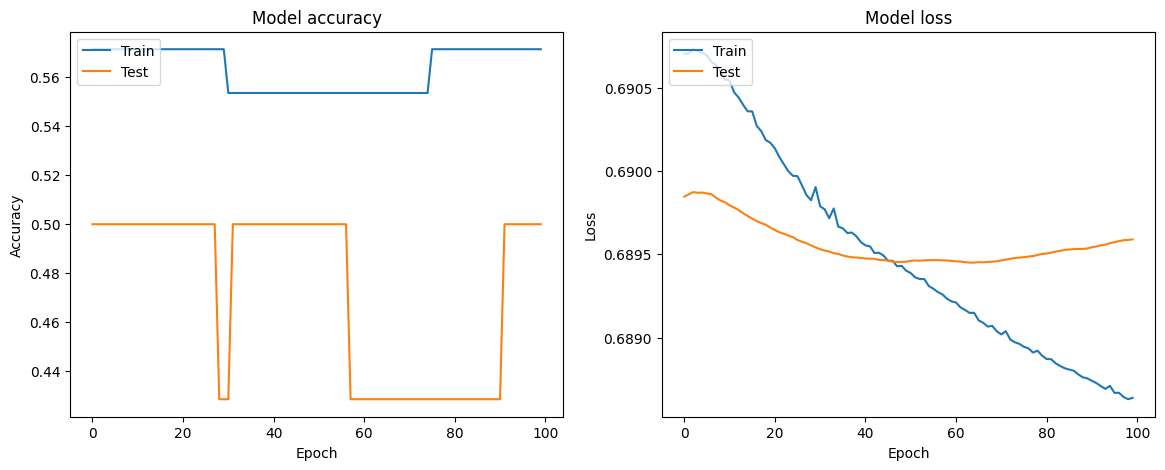

In [ ]:
# Plot the training history
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


Epoch 1/50
2/2 [==============================] - 4s 384ms/step - loss: 0.6844 - accuracy: 0.5893 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 41ms/step - loss: 0.6855 - accuracy: 0.5179 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 38ms/step - loss: 0.6749 - accuracy: 0.5893 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 41ms/step - loss: 0.6926 - accuracy: 0.5357 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 42ms/step - loss: 0.6854 - accuracy: 0.6250 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 40ms/step - loss: 0.6858 - accuracy: 0.5714 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 0s 41ms/step - loss: 0.6854 - accuracy: 0.6250 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 8/50
2/2 [==========

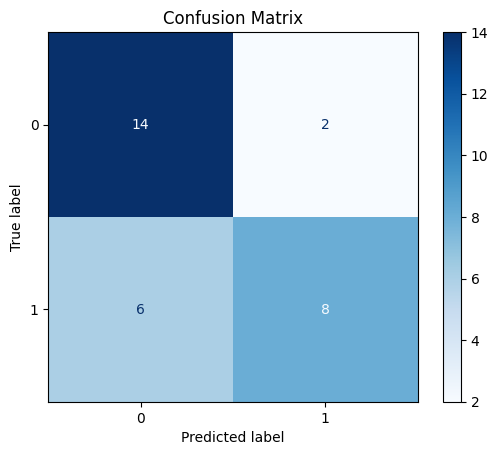

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights for unbalanced datasets
classes = np.unique(y_train_class)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_class)
class_weights_dict = dict(zip(classes, class_weights))

# Define the LSTM model with dropout for regularization
model = Sequential([
    LSTM(30, input_shape=(X_train.shape[1], 1), dropout=0.2, recurrent_dropout=0.2),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with a possibly smaller learning rate and class weight
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights to handle imbalance
history = model.fit(
    X_train_rnn, y_train_class,
    epochs=50,
    validation_split=0.2,
    class_weight=class_weights_dict,
    batch_size=32  # Consider trying different batch sizes
)

# Evaluate the model to see if the performance has improved
test_loss, test_accuracy = model.evaluate(X_test_rnn, y_test_binary)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict classes using the trained model
y_pred_class = (model.predict(X_test_rnn) > 0.5).astype(int)

# Generate the new confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_class)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Define the number of splits
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# To store metrics for each fold
confusion_matrices = []
roc_auc_scores = []

for train_index, test_index in tscv.split(X_normalized):
    X_train_cv, X_test_cv = X_normalized[train_index], X_normalized[test_index]
    y_train_cv, y_test_cv = y_binary[train_index], y_binary[test_index]

    # Reshape the data for LSTM network
    X_train_cv_rnn = X_train_cv.reshape((X_train_cv.shape[0], X_train_cv.shape[1], 1))
    X_test_cv_rnn = X_test_cv.reshape((X_test_cv.shape[0], X_test_cv.shape[1], 1))

    # Define the model (as before)
    model = Sequential([
        Bidirectional(LSTM(50, input_shape=(X_train_cv_rnn.shape[1], 1))),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model (as before)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    model.fit(X_train_cv_rnn, y_train_cv, epochs=100, batch_size=32, verbose=0)  # Set verbose to 0 to suppress output

    # Predict probabilities
    y_pred_probs = model.predict(X_test_cv_rnn).ravel()

    # Binarize predictions based on threshold
    threshold = 0.5  # This threshold can be adjusted
    y_pred_class = (y_pred_probs > threshold).astype(int)

    # Calculate metrics for this fold
    cm = confusion_matrix(y_test_cv, y_pred_class)
    confusion_matrices.append(cm)

    fpr, tpr, thresholds = roc_curve(y_test_cv, y_pred_probs)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

# Now, you can calculate the average of the metrics across all folds
# Average Confusion Matrix
average_cm = np.mean(confusion_matrices, axis=0)
print("Average Confusion Matrix:\n", average_cm)

# Average ROC AUC Score
average_roc_auc = np.mean(roc_auc_scores)
print("Average ROC AUC Score:", average_roc_auc)


NameError: name 'y_binary' is not defined

1/1 [==============================] - 0s 144ms/step


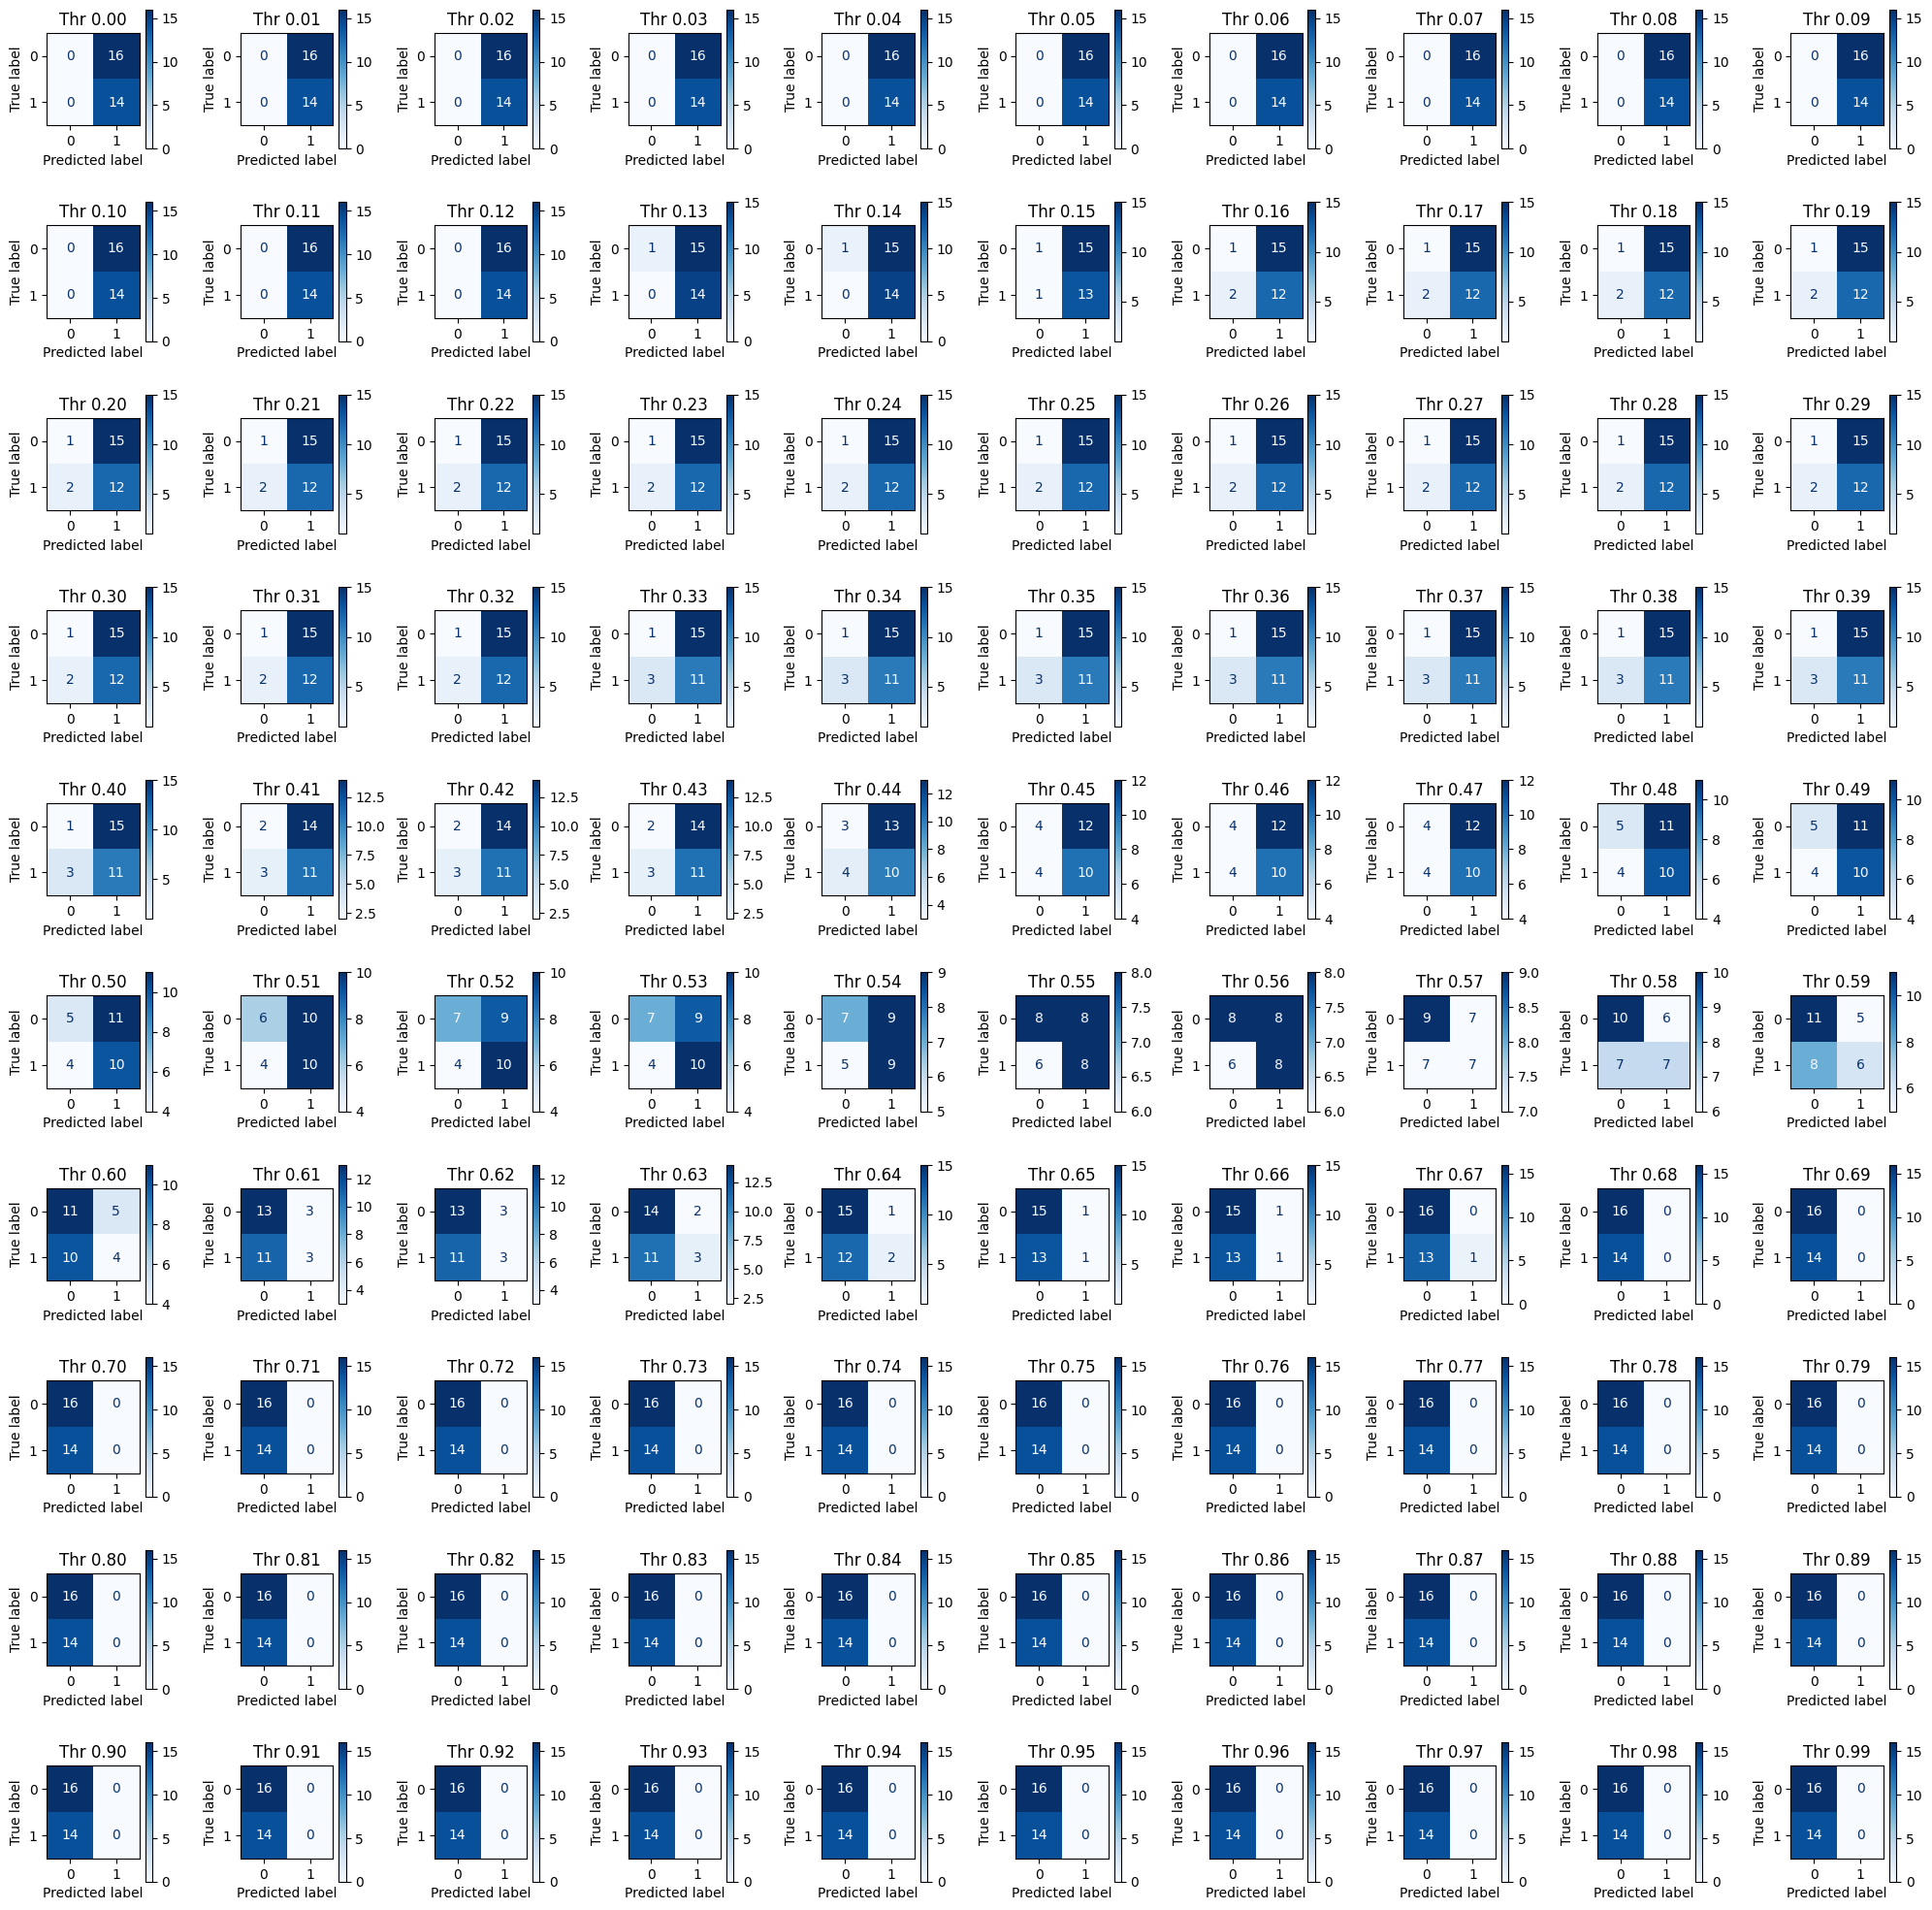

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assume 'model' is your trained Keras model
# Predict probabilities for the test set
y_pred_probs = model.predict(X_test_rnn)

# Function to apply threshold to probabilities to create binary predictions
def apply_threshold(probs, threshold):
    return (probs > threshold).astype(int)

# Choose a range of thresholds to try
thresholds = np.linspace(0, 1, 101)

# Plot confusion matrices for various thresholds
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))  # Adjust the subplot grid as needed
axes = axes.flatten()  # Flatten to 1D array for easy iteration

for ax, threshold in zip(axes, thresholds):
    # Get binary predictions using the current threshold
    y_pred_class = apply_threshold(y_pred_probs, threshold)

    # Compute the confusion matrix for this threshold
    cm = confusion_matrix(y_test_binary, y_pred_class)

    # Plot the confusion matrix
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues, ax=ax)
    ax.title.set_text(f'Thr {threshold:.2f}')

plt.tight_layout()  # Adjust spacing
plt.show()


1/1 [==============================] - 0s 41ms/step


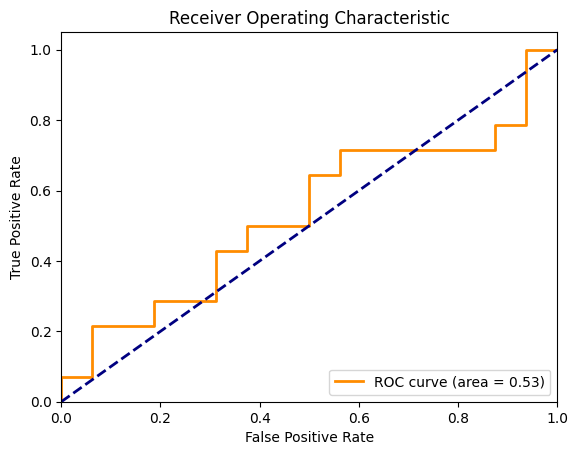

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assume 'model' is your trained Keras model and you have a test set 'X_test_rnn'
# Predict probabilities for the positive class (damage)
y_pred_probs = model.predict(X_test_rnn).ravel()

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
##using a bidirectional LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

# Define the bidirectional LSTM model
bidirectional_lstm_model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    Bidirectional(LSTM(50)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
bidirectional_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = bidirectional_lstm_model.fit(
    X_train_rnn, y_train_class,
    epochs=100,
    validation_split=0.2
)


Epoch 1/100
2/2 [==============================] - 18s 2s/step - loss: 0.6944 - accuracy: 0.4464 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 101ms/step - loss: 0.6949 - accuracy: 0.5179 - val_loss: 0.6945 - val_accuracy: 0.4286
Epoch 3/100
2/2 [==============================] - 0s 92ms/step - loss: 0.6925 - accuracy: 0.5357 - val_loss: 0.6938 - val_accuracy: 0.4286
Epoch 4/100
2/2 [==============================] - 0s 85ms/step - loss: 0.6836 - accuracy: 0.5714 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 102ms/step - loss: 0.6810 - accuracy: 0.5714 - val_loss: 0.6925 - val_accuracy: 0.4286
Epoch 6/100
2/2 [==============================] - 0s 87ms/step - loss: 0.6817 - accuracy: 0.5714 - val_loss: 0.6922 - val_accuracy: 0.4286
Epoch 7/100
2/2 [==============================] - 0s 104ms/step - loss: 0.6809 - accuracy: 0.5893 - val_loss: 0.6915 - val_accuracy: 0.5714
Epoch 8/100
2/2 [=

1/1 [==============================] - 5s 5s/step


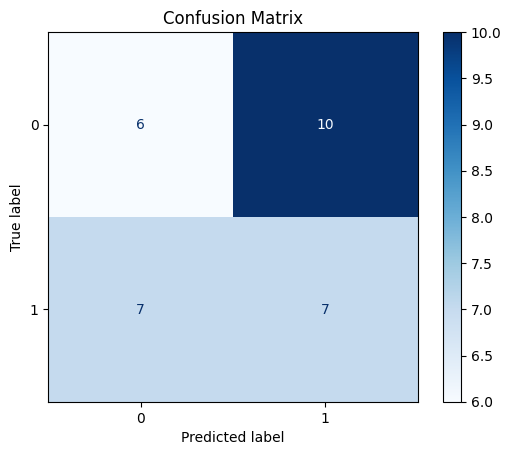

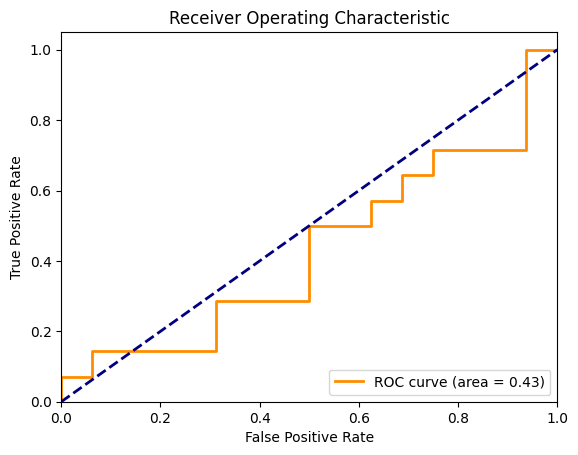

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_probs = bidirectional_lstm_model.predict(X_test_rnn)
y_pred_class = (y_pred_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Define the number of splits
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# To store metrics for each fold
confusion_matrices = []
roc_auc_scores = []

for train_index, test_index in tscv.split(X_normalized):
    X_train_cv, X_test_cv = X_normalized[train_index], X_normalized[test_index]
    y_train_cv, y_test_cv = y_binary[train_index], y_binary[test_index]

    # Reshape the data for LSTM network
    X_train_cv_rnn = X_train_cv.reshape((X_train_cv.shape[0], X_train_cv.shape[1], 1))
    X_test_cv_rnn = X_test_cv.reshape((X_test_cv.shape[0], X_test_cv.shape[1], 1))

    # Define the model (as before)
    model = Sequential([
        Bidirectional(LSTM(50, input_shape=(X_train_cv_rnn.shape[1], 1))),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model (as before)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    model.fit(X_train_cv_rnn, y_train_cv, epochs=100, batch_size=32, verbose=0)  # Set verbose to 0 to suppress output

    # Predict probabilities
    y_pred_probs = model.predict(X_test_cv_rnn).ravel()

    # Binarize predictions based on threshold
    threshold = 0.5  # This threshold can be adjusted
    y_pred_class = (y_pred_probs > threshold).astype(int)

    # Calculate metrics for this fold
    cm = confusion_matrix(y_test_cv, y_pred_class)
    confusion_matrices.append(cm)

    fpr, tpr, thresholds = roc_curve(y_test_cv, y_pred_probs)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

# Now, you can calculate the average of the metrics across all folds
# Average Confusion Matrix
average_cm = np.mean(confusion_matrices, axis=0)
print("Average Confusion Matrix:\n", average_cm)

# Average ROC AUC Score
average_roc_auc = np.mean(roc_auc_scores)
print("Average ROC AUC Score:", average_roc_auc)


NameError: name 'y_binary' is not defined